What file would you like to look at: sampledata.csv
• Maximum Value
	Age Maximum Value : 90
	WorkClass Maximum Value : n/a
	Final Weight Maximum Value : 1033222
	Education Maximum Value : n/a
	EducationNum Maximum Value : 16
	Marital Status Maximum Value : n/a
	Gender Maximum Value : n/a
	Capital Gain Maximum Value : 99999
	Capital Loss Maximum Value : 97592
	hours/Week Maximum Value : 99
	Native Country Maximum Value : n/a
	Salary Maximum Value : n/a
• Minimum Value
	Age Minimum Value : 17
	WorkClass Minimum Value : n/a
	Final Weight Minimum Value : 19302
	Education Minimum Value : n/a
	EducationNum Minimum Value : 1
	Marital Status Minimum Value : n/a
	Gender Minimum Value : n/a
	Capital Gain Minimum Value : 114
	Capital Loss Minimum Value : 5
	hours/Week Minimum Value : 1
	Native Country Minimum Value : n/a
	Salary Minimum Value : n/a
• Average Value
	Age Average Value : 44.01622418879056
	WorkClass Average Value : n/a
	Final Weight Average Value : 188080.51548672566
	Education Aver

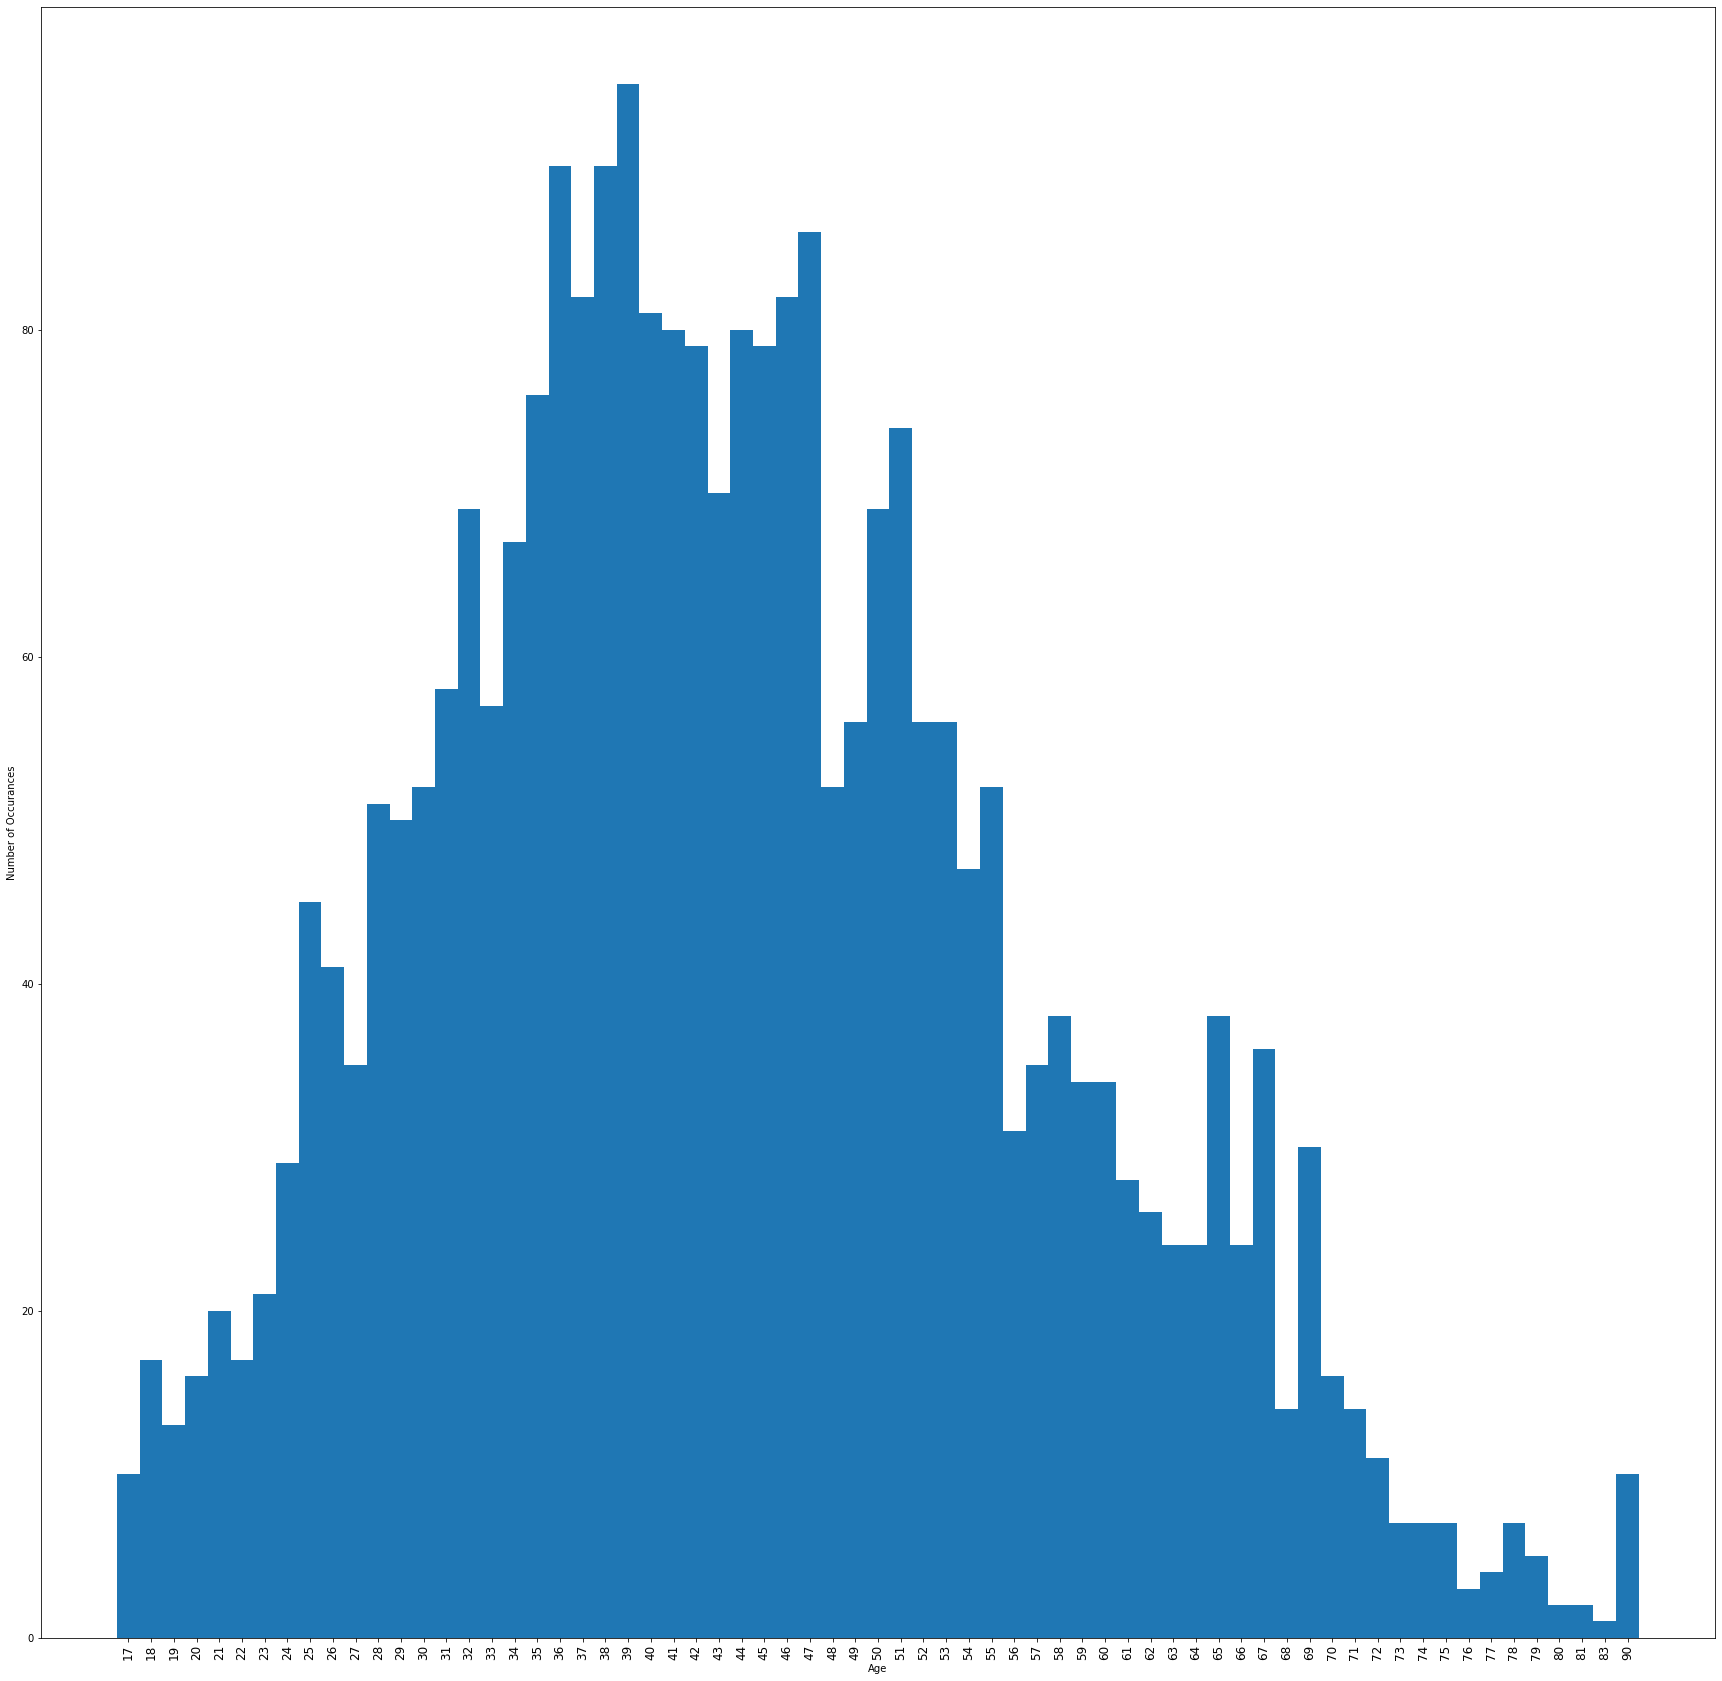

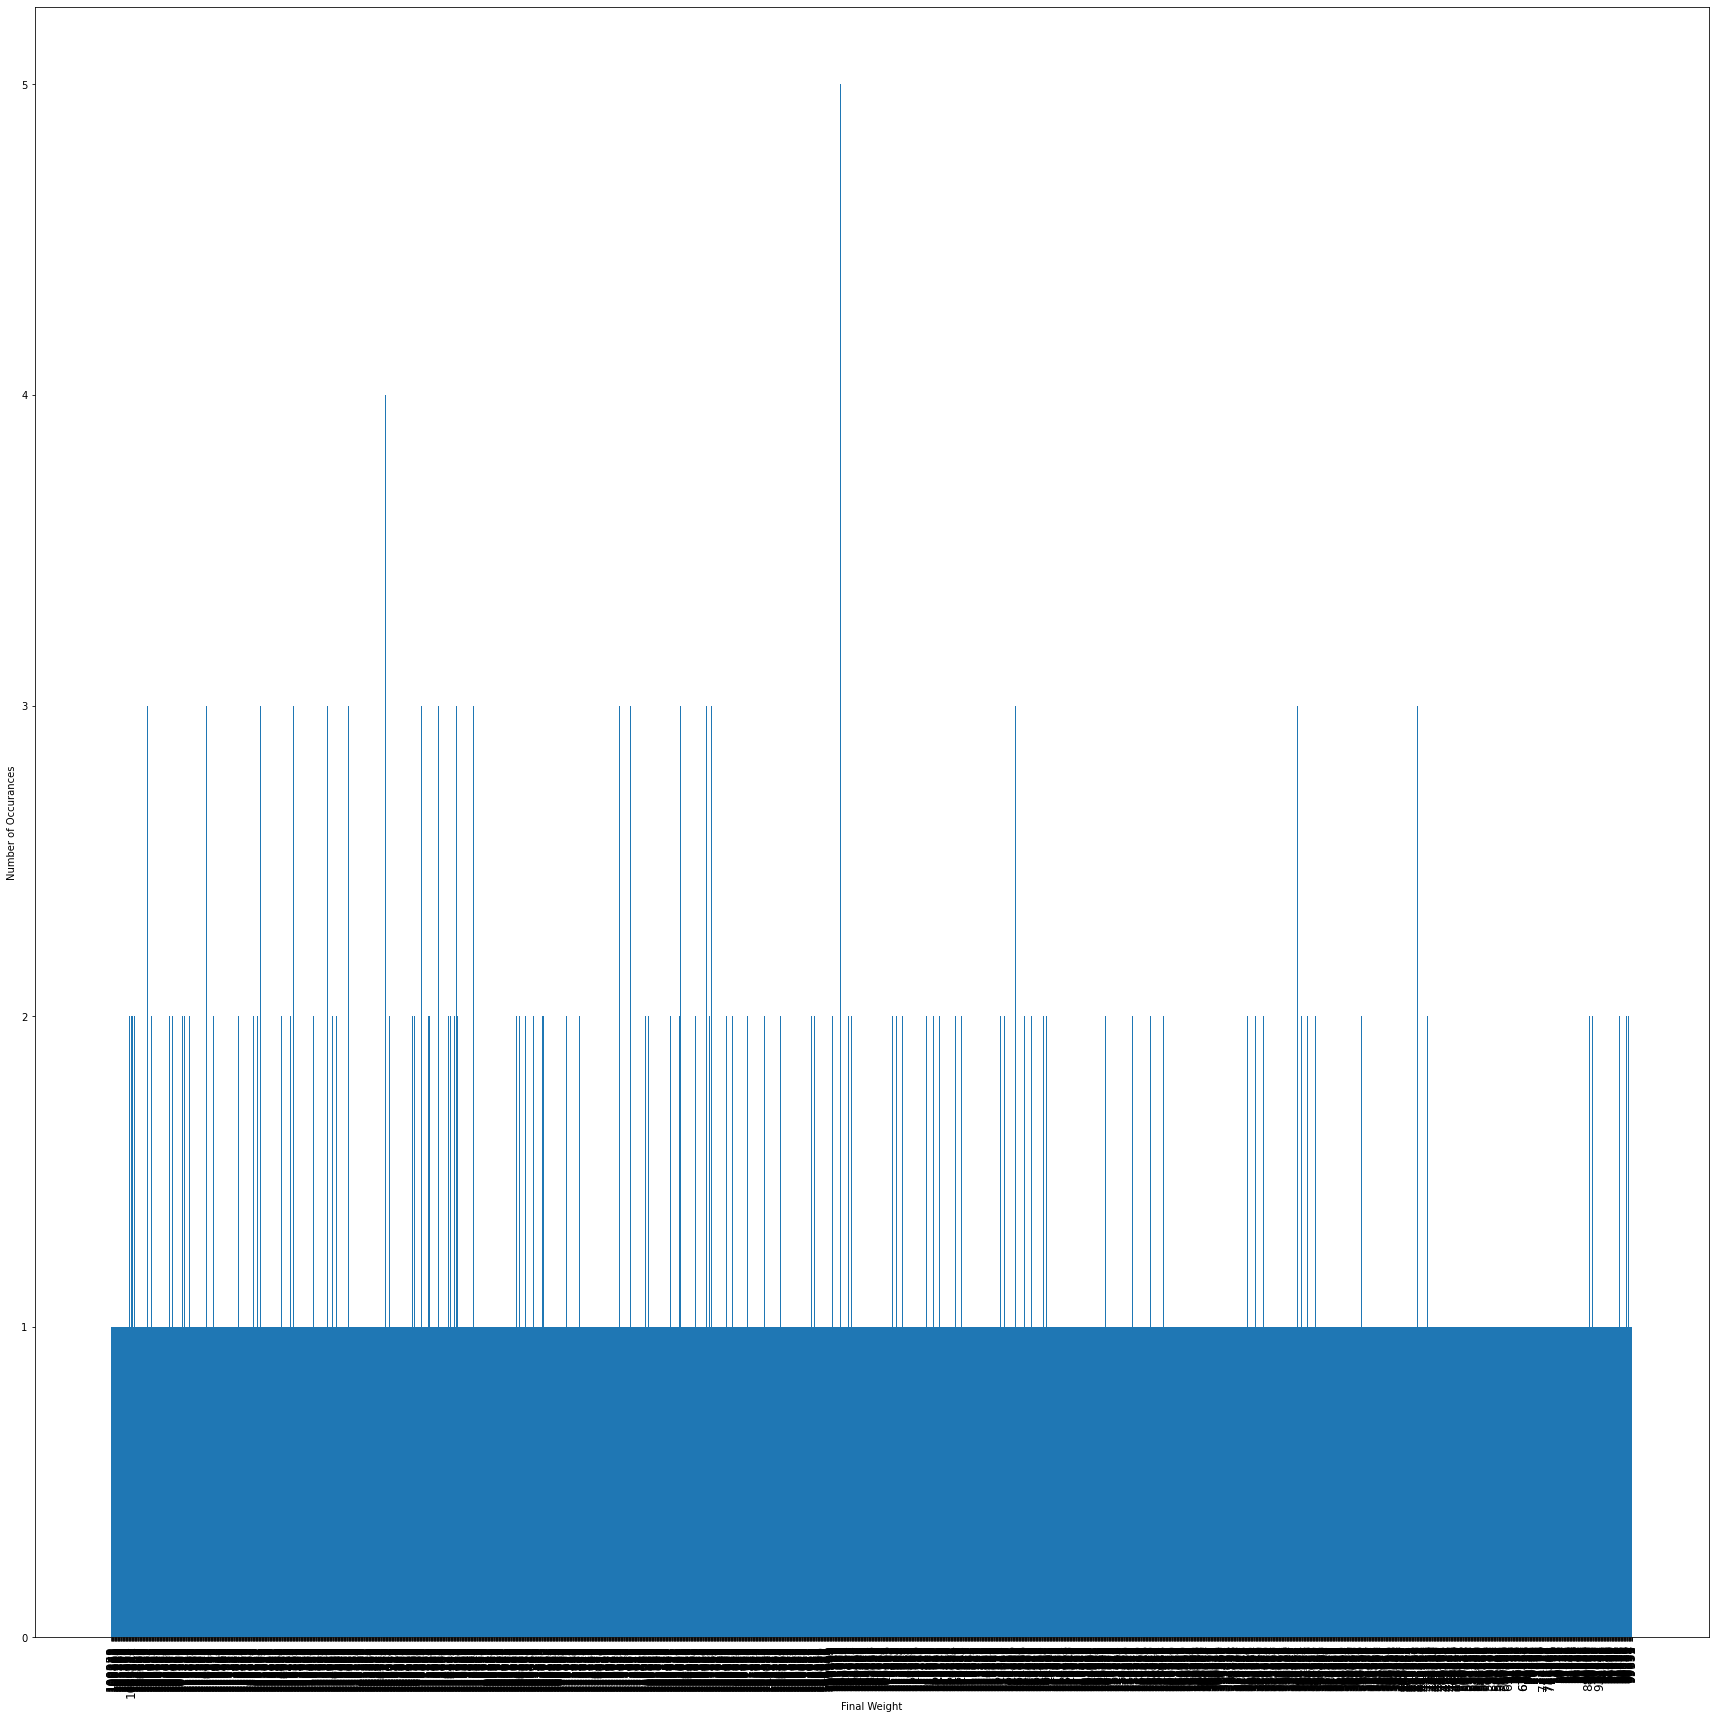

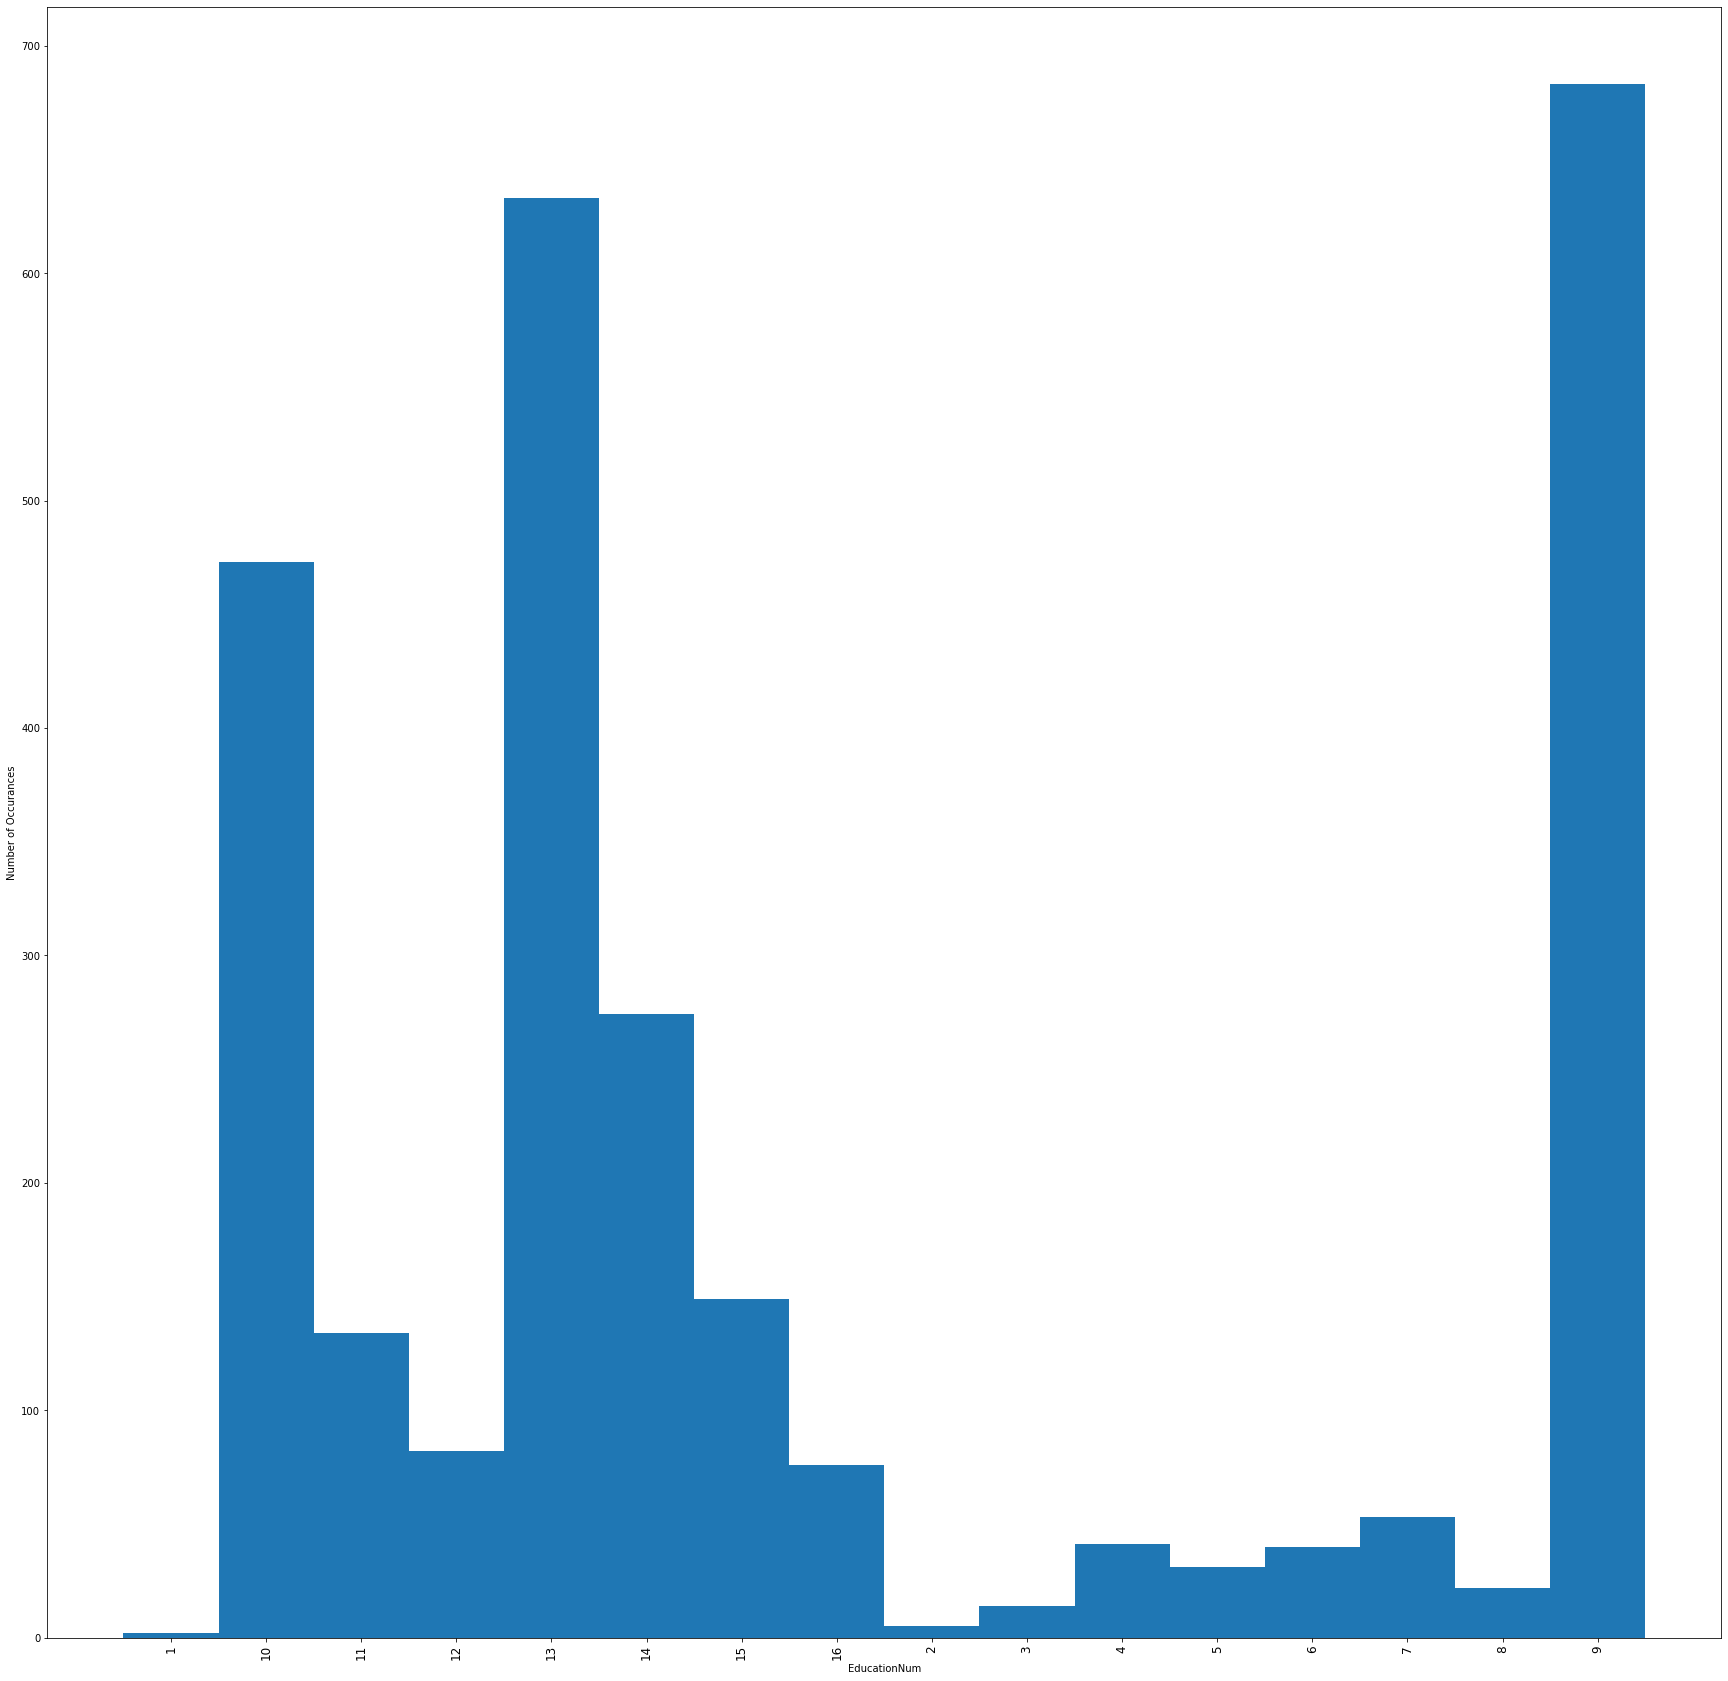

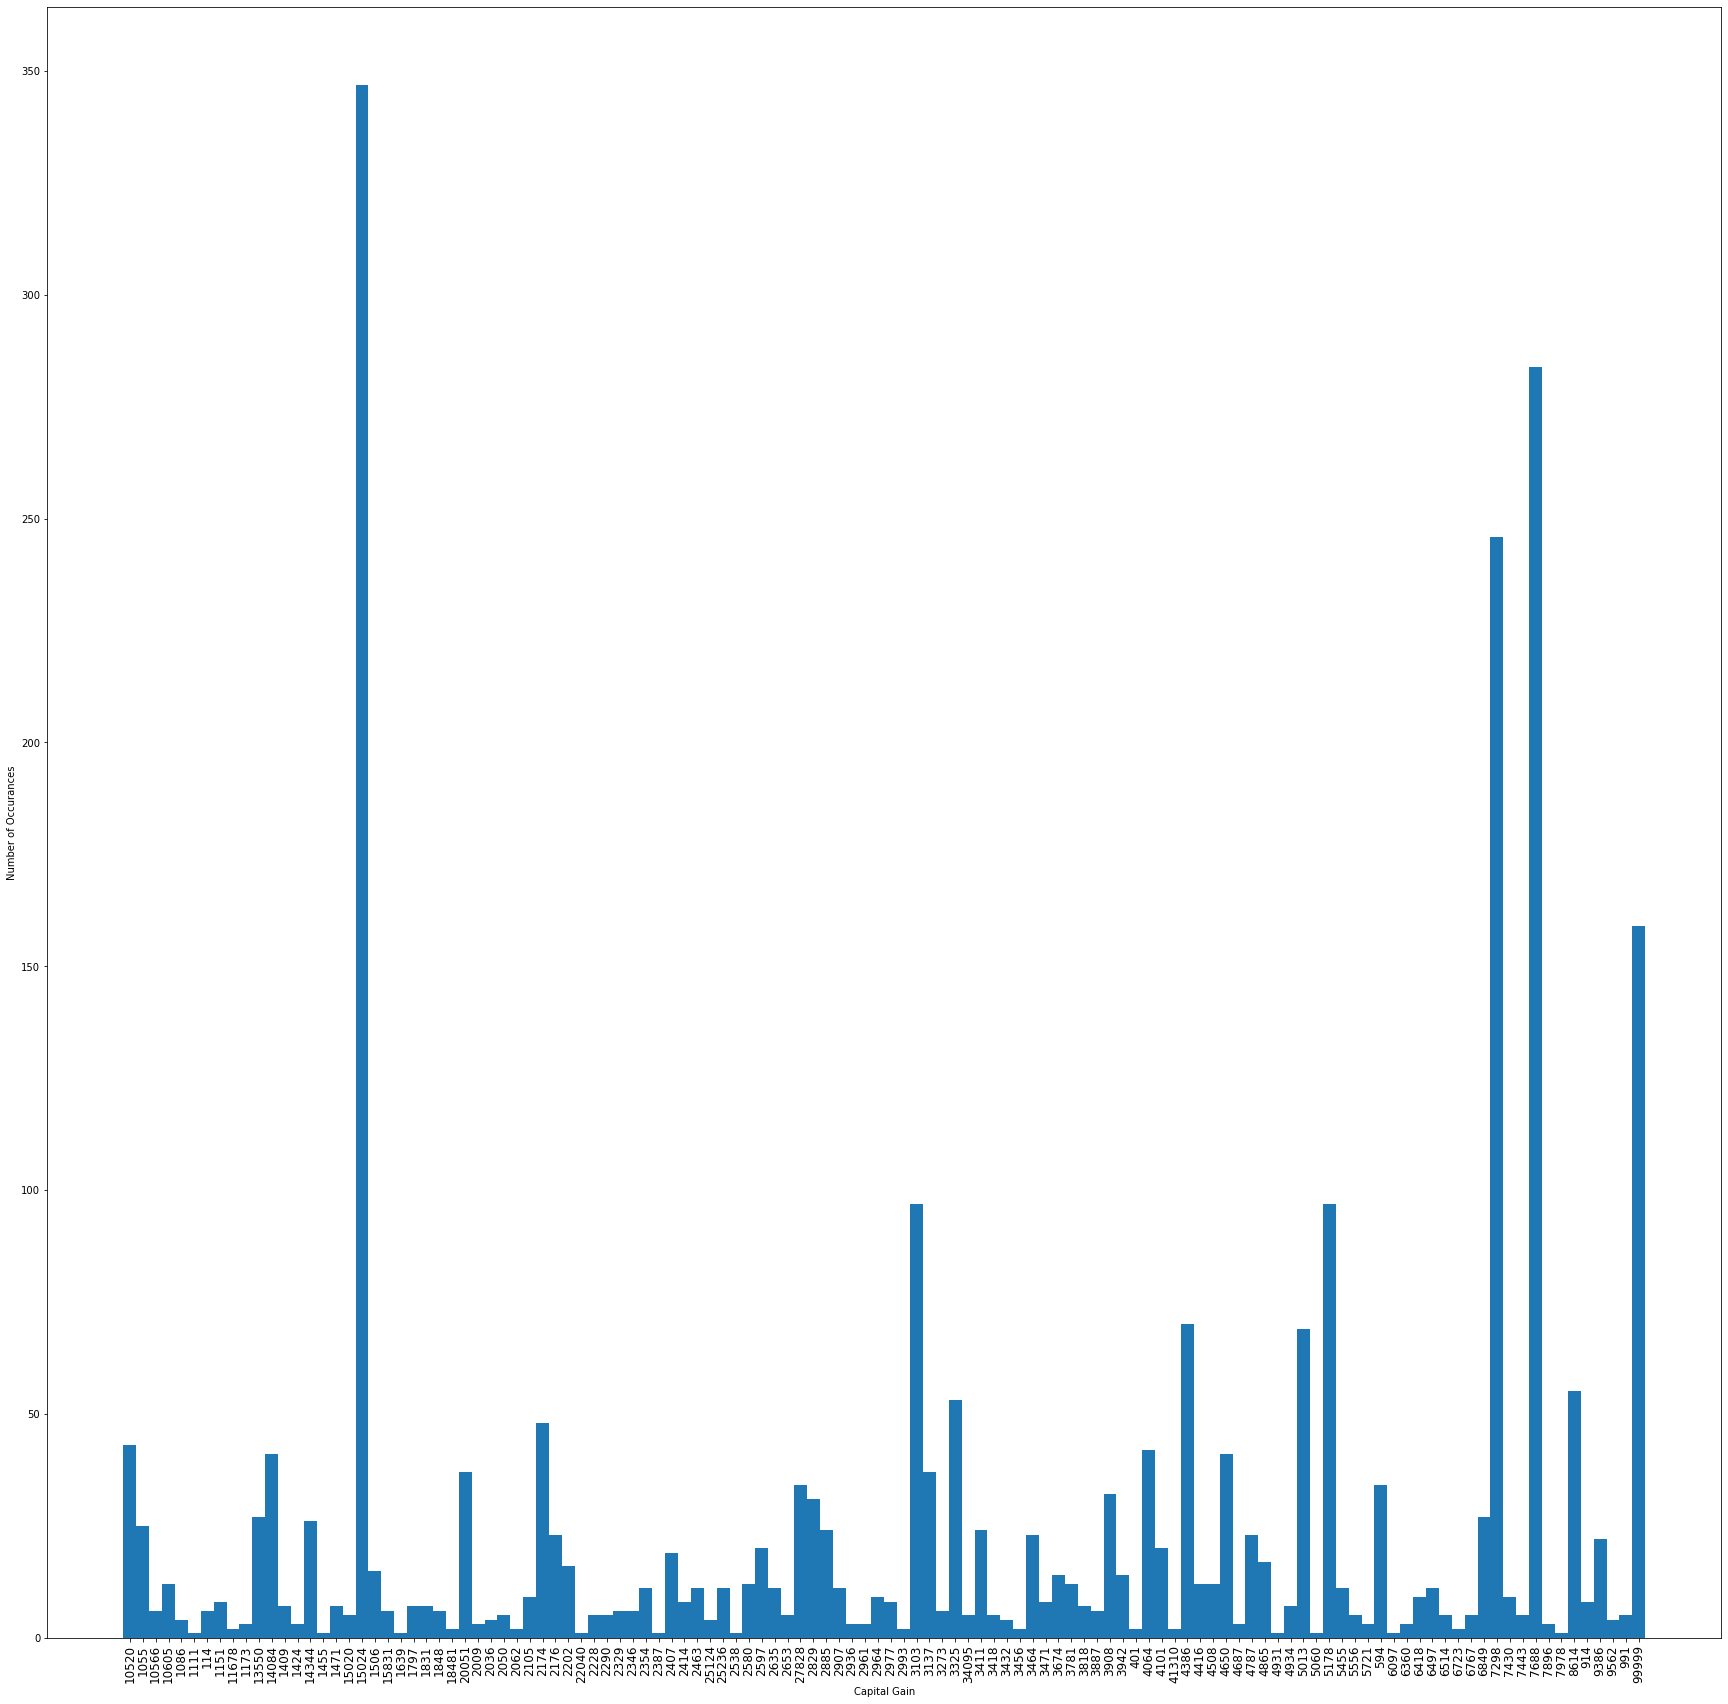

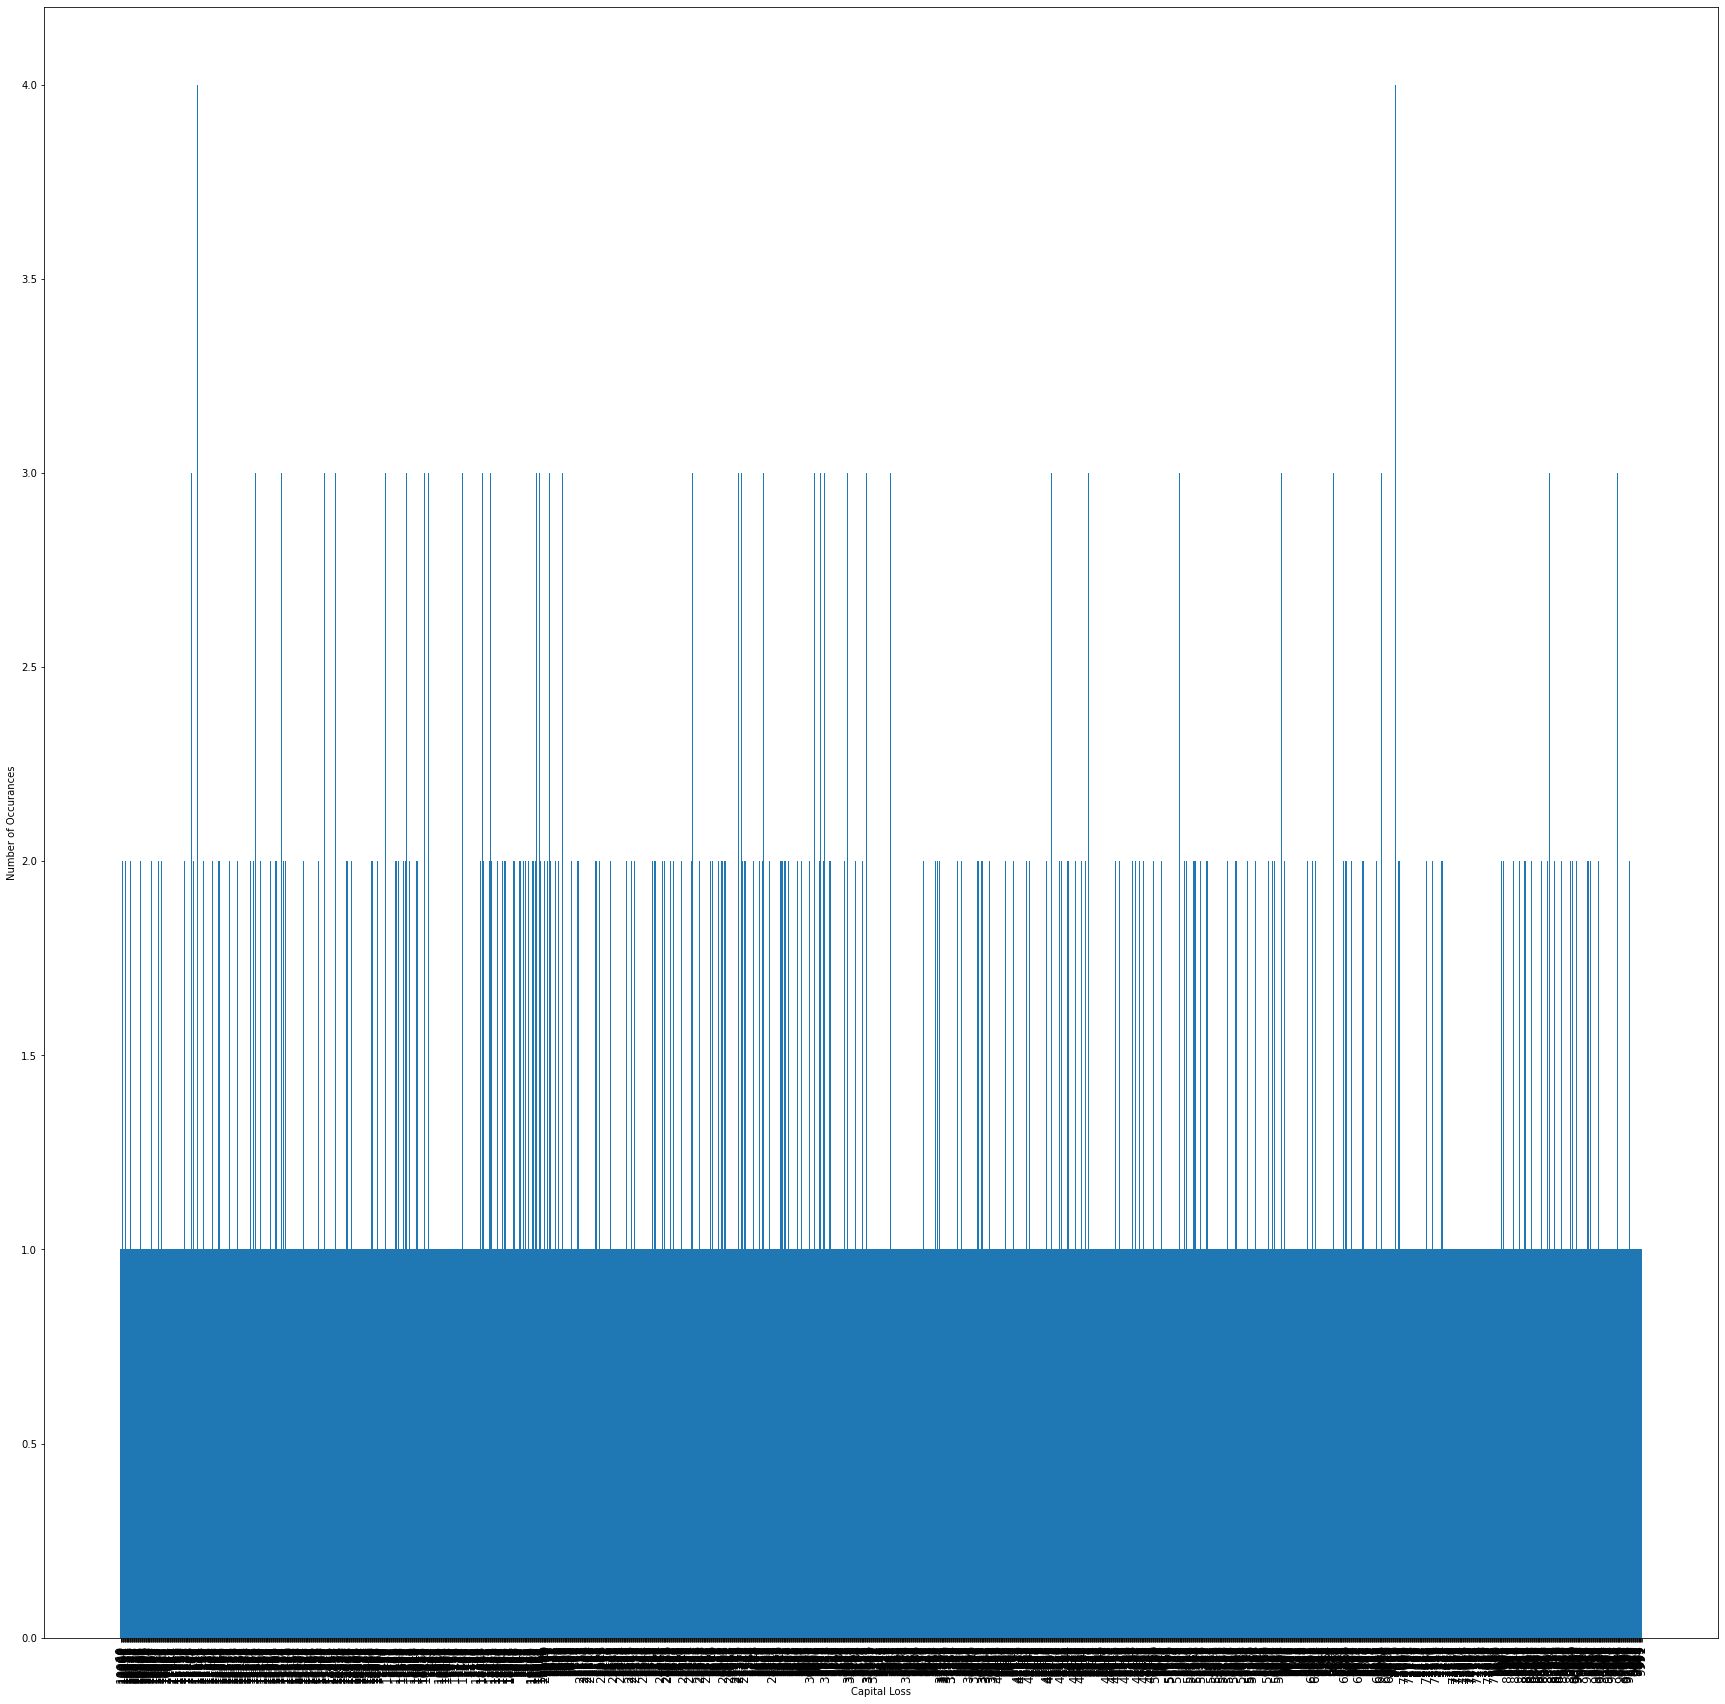

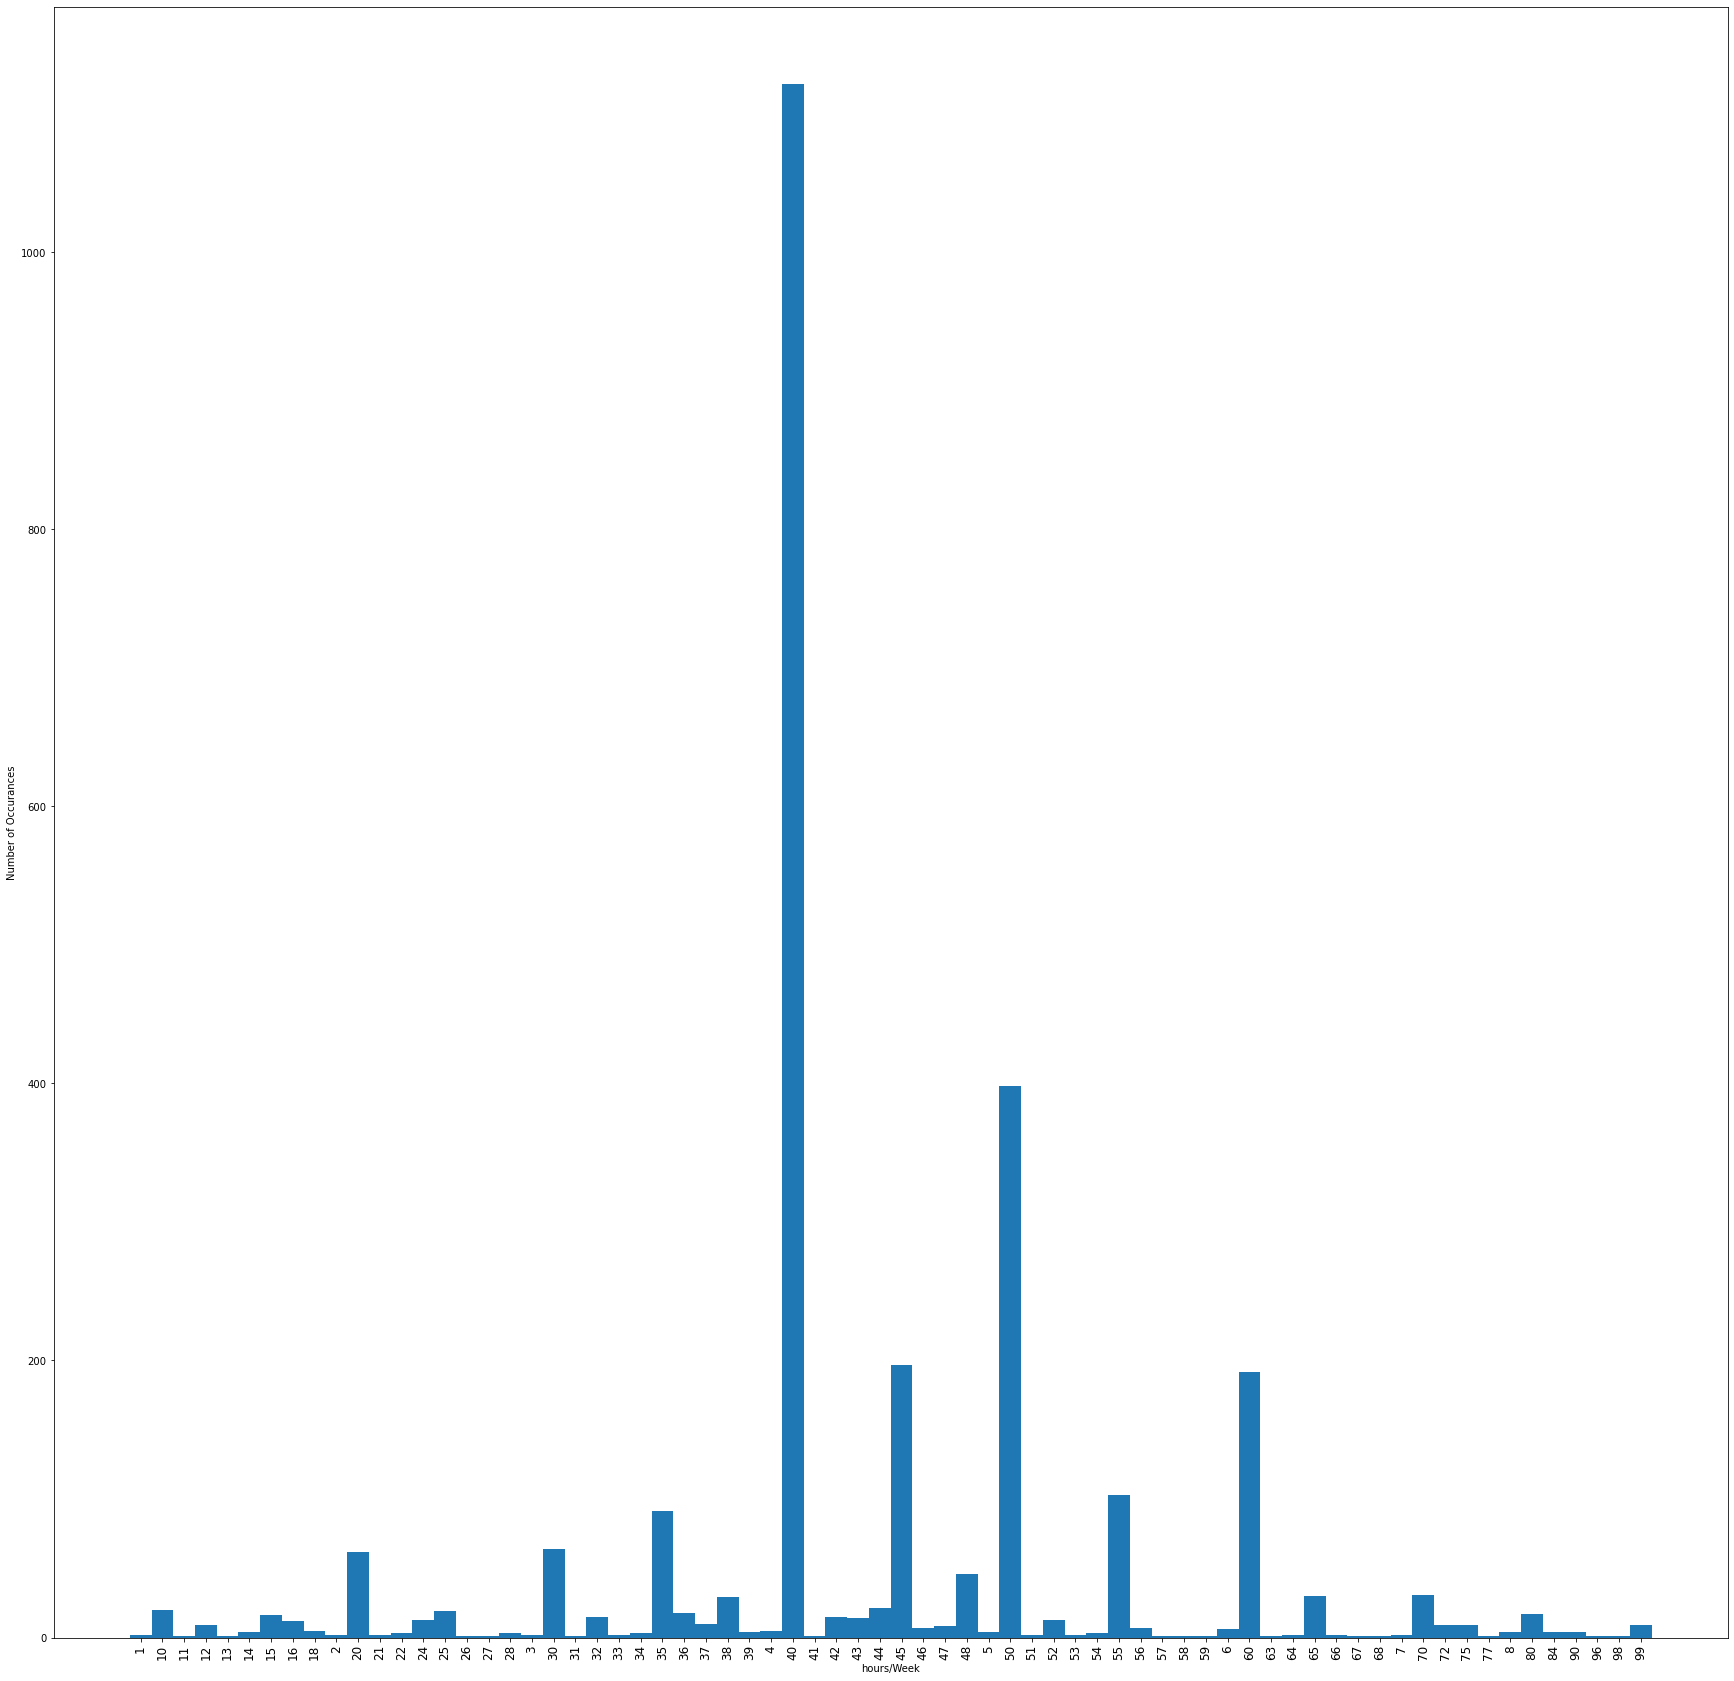

In [13]:
#Vincent Yu T03 September 24 2020 Assignment 01 v1.0
import csv
import matplotlib.pyplot as plt

'''
Function opens the csv files and reads it and splits it on each ','
then creates list and adds all the data into the list
Takes in fileName then returns the list of data
'''

def readFile(fileName):
    listOfPersons = []
    with open(fileName) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter = ',')
        #if there is an empty row passes to the next row
        for row in csv_reader:
            try:
                listOfPersons.append(row)
            except:
                pass
            
    return listOfPersons
    
'''
finds maximum value in each column by checking if the value its currently 
on is greater than the one it previously thought was the largest
takes in list and which attribute (position) is asked for 
'''

def findMax(list,position):
    #tries to get the first entry of the data into integer if not then function returns 'n/a'
    try:
        maxValue = int(list[1][position])
    except:
        maxValue = "n/a"
    for row in range(len(list)):
        try:
            if maxValue < int(list[row][position]):
                maxValue = int(list[row][position])

        except: 
            pass
                
    return maxValue

'''
finds minimum value in each column by checking if the value its currently 
on is smaller than the one it previously thought was the largest
takes in list and which attribute (position) is asked for 
'''

def findMin(list,position):
    #tries to get the first entry of the data into integer if not then function returns 'n/a'
    try:
        minValue = int(list[1][position])
    except:
        minValue = "n/a"
    for row in range(len(list)):
        try:
            if minValue > int(list[row][position]):
                minValue = int(list[row][position])

        except: 
            pass
                
    return minValue
'''
finds the average value of the column in question, by adding all numerical values
then dividing it by the total amount of terms 
takes in list and which attricute (position) is asked for
'''
def findAvg(list,position):
    
    #tries to get the first entry of the data into integer if not then function returns 'n/a'
    totValue = 0
    for row in range(len(list)):
        #if the value can be turned into a integer and added 
        try:
            totValue += int(list[row][position])
        except:
            pass
        
    #total value of elements / the amount of units subtracted the title data
    avgValue = totValue / int(len(list)-1)
    
    #if the average value didn't change from declaration 
    if avgValue == 0.0:
        avgValue = "n/a"
        
    return avgValue

'''
find the standard deviation in each coloumn 
((1/len)*Σ(x - mean) ** 2) ** (1/2)
Σ sum of elements which we calculate with a for loop
'''
def findStd(list,position):
    #checking if data has enough integers (more than 2) to calculate standard deviation
    totValue = 0
    viableNum = 0
    ddof=0
    mean = findAvg(list,position)
    #the average function will return "n/a" if there isn't enough suitable integers
    if str(mean) == "n/a":
        return "n/a"
    else:
        for row in range(len(list)):
            try:
                totValue += (int(list[row][position]) - mean) ** 2 
            except:
                pass
            
        underRoot = totValue*1.0/(len(list)-1)
        
        return (underRoot) ** (1/2)

'''
Finding the most common element in each coloumn
does this by setting a element and then running through the list looking
if that element has any matches then sets a counter for the amount
of occurances that that specific element has occured in the list
takes in list and position and returns the element that occured the most
'''
def findMostCommon(list,position):
    counter = 0
    maxElement = None
    
    for row in range(len(list)):
        frequency = 0
        tempElement = list[row][position]
        for j in range(len(list)):
            if tempElement == list[j][position]:
                frequency += 1
        if (frequency > counter):
            counter = frequency
            maxElement = list[row][position]
    
    return maxElement
    
'''
Finding the least common element in each column
first creates another list with only data needed for the finding
of the least common value, works similar to the most common value
but does the opposite
takes in list and potition returns least occuring element
'''    
def findLeastCommon(list,position):
    counter = 10 ** 100
    leastElement = None
    listOfElements = []
    for row in range(len(list)):
        listOfElements.append(list[row][position])
    
    #removes the first element (data title)
    listOfElements.remove(listOfElements[0])
    
    for i in listOfElements:
        frequency = listOfElements.count(i)
        if(frequency < counter):
            counter = frequency
            leastElement = i
    
    
    return leastElement

    
'''
Function to create histograms from data 
Generates a hisogram of unique occurances of the data and 
how many times it has occured in the data provided
Does this by creating a list of normal data and a list
of unique data which are linked in terms of their index value
creates multiple histograms depending on the amount of integers are available in the list
takes in list and position and returns nothing shows graph from within function
'''    
def genHistograms(list,position):
    #creating a list of data to generate histogram from
    listOfUniqueData = []
    listOfNormalData = []
    listOfOccurances = []
    occurances = []
    plotFlag = True
    numCheck = 0
    
    #makes a list of normal data (only accepts numerical entries)
    for row in range(len(list)):
        try:
            numCheck += int(list[row][position])
            listOfNormalData.append(list[row][position])
            plotFlag = True
        #if not integer sets flag to not make a plot
        except:
            pass
            plotFlag = False
    
    
    #makes a list of unique elements and orginizes them 
    for row in range(len(listOfNormalData)):
        #checks if its already in list
        if listOfNormalData[row] not in listOfUniqueData:
            listOfUniqueData.append(listOfNormalData[row])
            
    #sorts the small unique list of elements (selection sort)
    for i in range(len(listOfUniqueData)):
        minIndex = i
        for j in range(i+1, len(listOfUniqueData)):
            if listOfUniqueData[j] < listOfUniqueData[minIndex]:
                minIndex = j
        temp = listOfUniqueData[i]
        listOfUniqueData[i] = listOfUniqueData[minIndex]
        listOfUniqueData[minIndex] = temp
    
    #checking number of occurances of each unique element
    for i in range(len(listOfUniqueData)):
        occurances = listOfNormalData.count(listOfUniqueData[i])
        listOfOccurances.append(occurances)

    
    if plotFlag:
        try:
            #creating histogram
            plt.figure(position, figsize=(30,30))
            plt.bar(listOfUniqueData,listOfOccurances,1)
            plt.show
            plt.ylabel("Number of Occurances")
            plt.xlabel(str(list[0][position]))
            #set font size to 5 and rotate it so the text is vertical
            plt.xticks(fontsize= 12, rotation = 90)
        except:
            pass

#ask user input for what file they would like to analyze      
userInput = input("What file would you like to look at: ")
listOfPersons = readFile(str(userInput))

#maximum values
print("• Maximum Value")
for col in range(len(listOfPersons[0])):
    maxVal = findMax(listOfPersons,col)
    print("\t"+str(listOfPersons[0][col])+" Maximum Value : "+str(maxVal))

    
#minimum values
print("• Minimum Value")
for col in range(len(listOfPersons[0])):
    minVal = findMin(listOfPersons,col)
    print("\t"+str(listOfPersons[0][col])+" Minimum Value : "+str(minVal))
    
#average values
print("• Average Value")
for col in range(len(listOfPersons[0])):
    avgVal = findAvg(listOfPersons,col)
    print("\t"+str(listOfPersons[0][col])+" Average Value : "+str(avgVal))

    
#standard deviation values
print("• Standard Deviation")
for col in range(len(listOfPersons[0])):
    stdVal = findStd(listOfPersons,col)
    print("\t"+str(listOfPersons[0][col])+" Standard Deviation Value : "+str(stdVal))

    
#most common value
print("• Most Common Value")
for col in range(len(listOfPersons[0])):
    mostCom = findMostCommon(listOfPersons,col)
    print("\t"+str(listOfPersons[0][col])+" Most Common Value : "+str(mostCom))

    
#least common value
print("• Least Common Value")
for col in range(len(listOfPersons[0])):
    leastCom = findLeastCommon(listOfPersons,col)
    print("\t"+str(listOfPersons[0][col])+" Least Common Value : "+str(leastCom))


#generating histograms
print("• Histograms")
for col in range(len(listOfPersons[0])):
    genHistograms(listOfPersons,col)




